# Project – Prediction and Quantization

### by Alex Tejada

## Part 1 - IIR filter for "one-step-ahead" prediction

In [47]:
from prediction import PredictionModel

In [48]:
x_n = [1.0, -1.0, 0.0, 2.0, 1.0, -1.0, -2.0, 0.0, 1.0, 0.0,] # Input x[n]
coefficients = [0.8570, -0.2500, 1.0000] # {a}
coefficients_optimized = [0.7716, -0.2835, 1.0000] # {a*}

# Setting up the prediction model
model = PredictionModel(x_n, coefficients, coefficients_optimized)

# calculating x^ and the error
model.getPrediction()

#### Plotting the Squence with the Prediction 

x[n] Values:   [ 1. -1.  0.  2.  1. -1. -2.  0.  1.  0.]
X^ Values:     [ 0.143  0.107 -1.25   1.286  0.643 -1.893 -1.536  0.5    2.143  0.25 ]
Error Values:  [ 0.857 -1.107  1.25   0.714  0.357  0.893 -0.464 -0.5   -1.143 -0.25 ]
Prediction Gain:  -0.47704215622283835


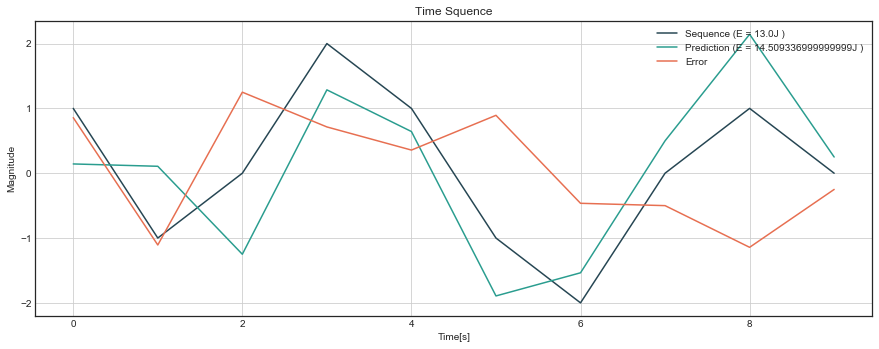

In [49]:
model.printPrediction()

##### Plotting the Coefficients with Zeros and Poles

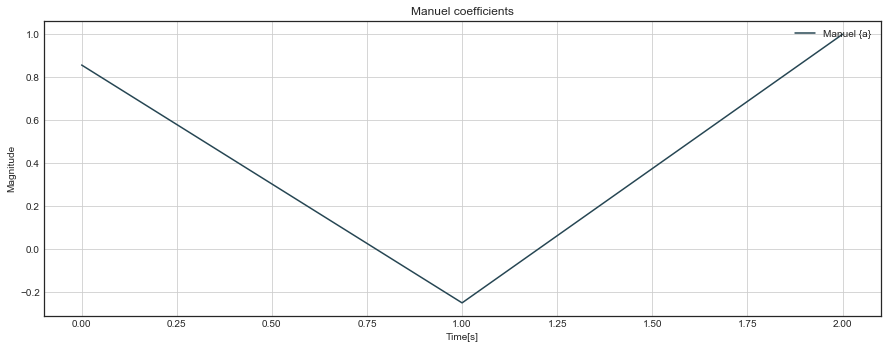

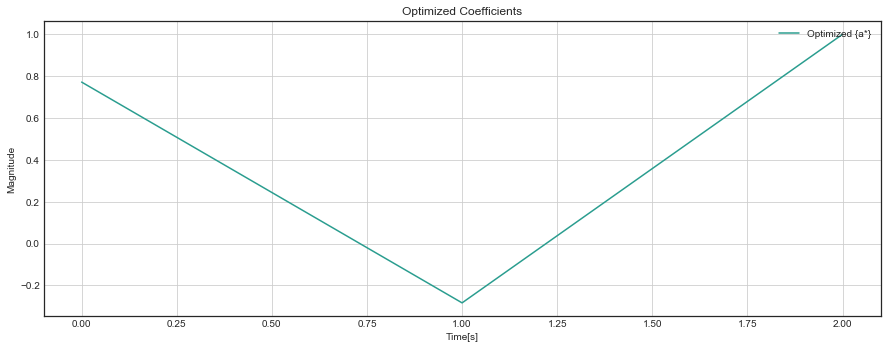

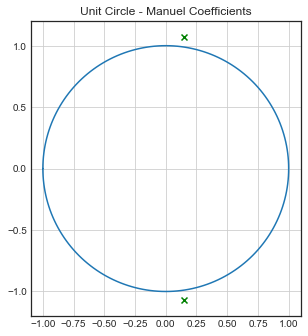

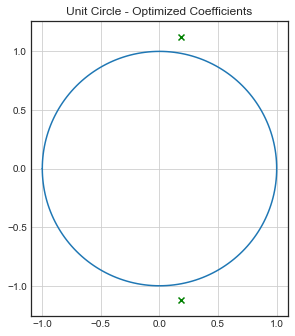

In [50]:
model.printCoefficients()

### Change Squence to wave file

In [51]:
import librosa
# Getting new x[n]
wav_x_n, sr = librosa.load("snip.wav", sr=None,duration=0.020)
                               
# Setting up the prediction model
model = PredictionModel(wav_x_n, coefficients_optimized, coefficients_optimized)

# calculating x^ and the error
model.getPrediction()                              

x[n] Values:   [ 0.05215454  0.04827881  0.01062012 -0.00839233 -0.01397705 -0.00674438
 -0.00439453  0.00915527  0.00061035 -0.01882935 -0.02053833 -0.02532959
 -0.03308105 -0.03240967 -0.02658081 -0.02316284 -0.02044678 -0.01147461
 -0.00814819 -0.00457764  0.00146484  0.00698853  0.00881958  0.00769043
  0.00695801  0.00372314  0.00366211  0.0022583   0.         -0.00259399
 -0.00338745 -0.00372314 -0.00509644 -0.00531006 -0.00686646 -0.00601196
 -0.0045166  -0.00247192  0.00039673  0.00039673  0.00302124  0.00296021
  0.00494385  0.00622559  0.00482178  0.00363159  0.00216675  0.00234985
  0.00424194  0.00637817  0.00506592  0.00482178  0.00427246  0.00360107
  0.00195312  0.00210571  0.00286865  0.00497437  0.0071106   0.0088501
  0.00720215  0.00576782  0.00369263  0.0032959   0.00332642  0.00241089
  0.00146484 -0.00024414 -0.00341797 -0.00558472 -0.00714111 -0.00805664
 -0.01000977 -0.01119995 -0.01190186 -0.01416016 -0.01419067 -0.01315308
 -0.01391602 -0.01544189 -0.01330566 

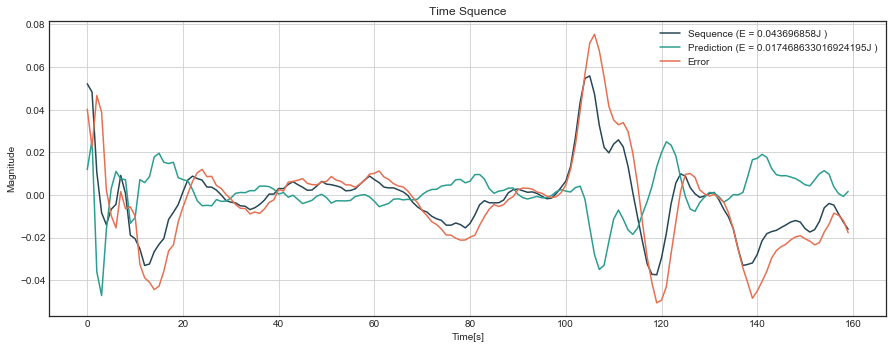

In [52]:
model.printPrediction()

In [53]:
# Getting new coefficients for a second-order filter
wav_coefficients = librosa.lpc(wav_x_n, 2)
print(wav_coefficients)

[ 1.         -1.5633409   0.67695105]


x[n] Values:   [ 0.05215454  0.04827881  0.01062012 -0.00839233 -0.01397705 -0.00674438
 -0.00439453  0.00915527  0.00061035 -0.01882935 -0.02053833 -0.02532959
 -0.03308105 -0.03240967 -0.02658081 -0.02316284 -0.02044678 -0.01147461
 -0.00814819 -0.00457764  0.00146484  0.00698853  0.00881958  0.00769043
  0.00695801  0.00372314  0.00366211  0.0022583   0.         -0.00259399
 -0.00338745 -0.00372314 -0.00509644 -0.00531006 -0.00686646 -0.00601196
 -0.0045166  -0.00247192  0.00039673  0.00039673  0.00302124  0.00296021
  0.00494385  0.00622559  0.00482178  0.00363159  0.00216675  0.00234985
  0.00424194  0.00637817  0.00506592  0.00482178  0.00427246  0.00360107
  0.00195312  0.00210571  0.00286865  0.00497437  0.0071106   0.0088501
  0.00720215  0.00576782  0.00369263  0.0032959   0.00332642  0.00241089
  0.00146484 -0.00024414 -0.00341797 -0.00558472 -0.00714111 -0.00805664
 -0.01000977 -0.01119995 -0.01190186 -0.01416016 -0.01419067 -0.01315308
 -0.01391602 -0.01544189 -0.01330566 

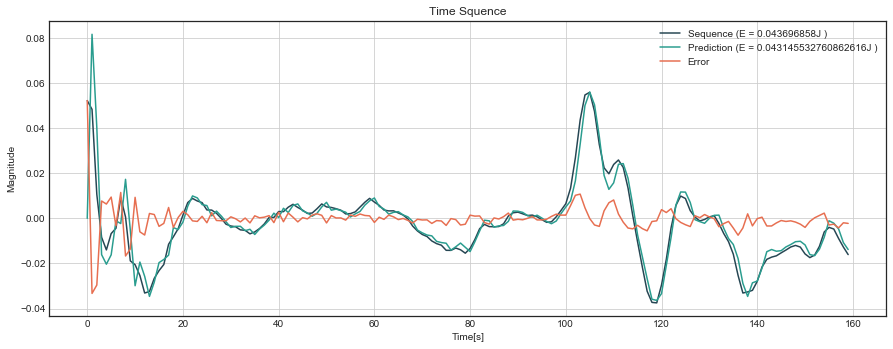

In [54]:
# Creating a new model with the new optimized coefficients
model = PredictionModel(wav_x_n, wav_coefficients, coefficients_optimized)

# calculating x^ and the error
model.getPrediction()  

# Getting the performance of the model with the new coefficients
model.printPrediction()

#### Questions of Interest 

i.) What is the difference between the optimal and non-optimal predictor coefficients in terms of the energy of the predicted (x_hat[n]) and error (e[n]) sequences?

    The predicted waveform generated a lower energy than that of the original signal. This could be due to the predicted value lack in ability to reconstruct the origianl input.

ii.) How does the optimal predictor improve the outcomes (think in terms of dB relative to the original sequence, or prediction gain)

    The optimized version yielded a lessor prediction gain. This also correlates to the lower error that was also given from the singal; since the prediction is more accurate, less distortion is occuring form predictions. Vice versa when considering the non-optimial coefficients; these gave more error to the signal and skewed the prediction, resulting in higher prediction gain.

iii.) Why does the prediction gain improve when using the optimal predictor vs. the non-optimal predictor?

    Since the optimal predictor are using coefficients that are more align with the singal, the gain improves tremendously. The non-optimal version, however, is not reinforced to hande the wave

iv.) What should happen to the prediction gain if you increase the order of the prediction filter? Can you increase the order of the filter “too much” … ? Explain what happens, and why

    Higher-ordered filters should improve the prediction to allow better presiction gain. However, overfitting can occur and provide a lessor efficiency for the filter.

## Part 2 - Using a quantizer to discretize sample values

#### Quantizing coefficients

In [55]:
quantize_coefficients = model.coeQuantizer2bin(coefficients_optimized)
print(quantize_coefficients )

[0.5812868685638481, -1, 1.0]


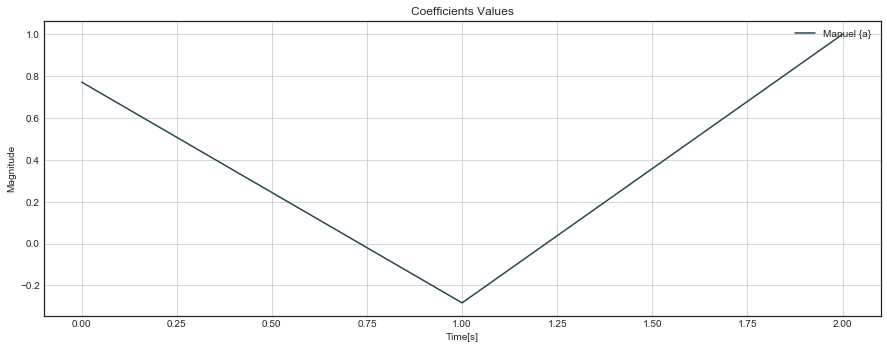

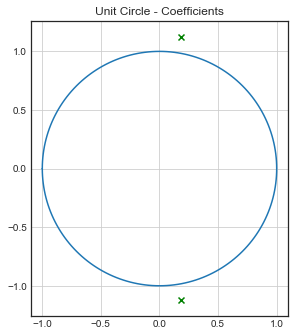

In [56]:
model.plotCoefficients(coefficients_optimized)

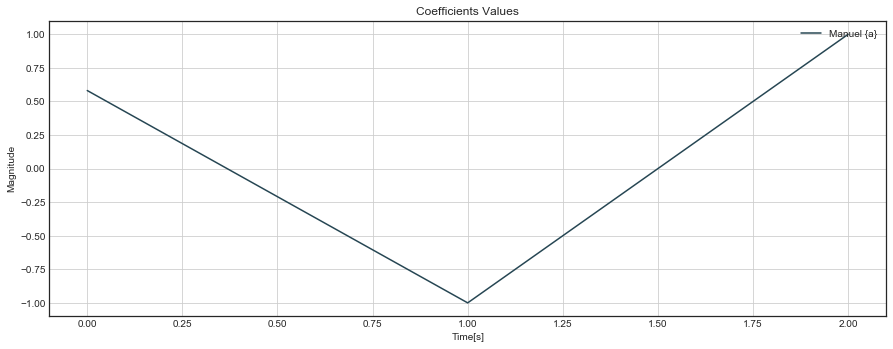

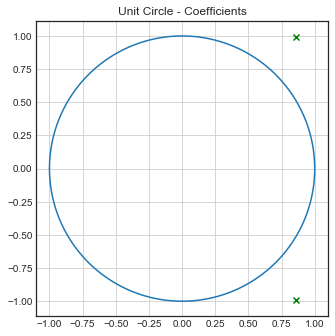

In [57]:
model.plotCoefficients(quantize_coefficients)

#### Applying the quantized coefficients

x[n] Values:   [ 1. -1.  0.  2.  1. -1. -2.  0.  1.  0.]
X^ Values:     [ 0.41871313  0.58128687 -2.          1.83742626  2.41871313 -1.41871313
 -2.83742626 -1.          2.41871313  1.        ]
Error Values:  [ 0.58128687 -1.58128687  2.          0.16257374 -1.41871313  0.41871313
  0.83742626  1.         -1.41871313 -1.        ]
Prediction Gain:  -3.864774465169595


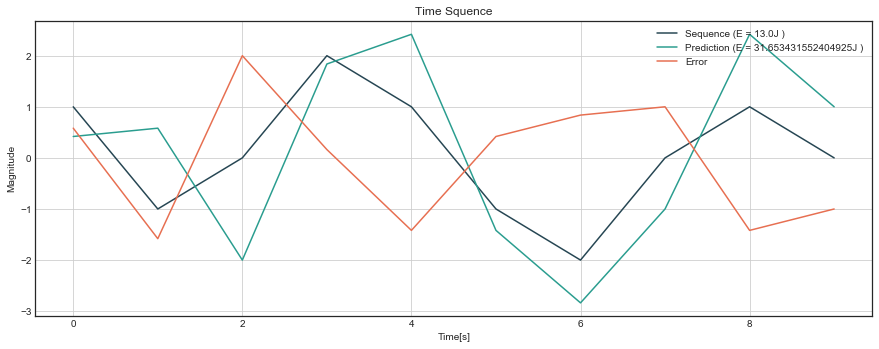

In [58]:
# Creating a new model with the new optimized coefficients
model = PredictionModel(x_n, quantize_coefficients, coefficients_optimized)

# calculating x^ and the error
model.getPrediction()  

# Getting the performance of the model with the new coefficients
model.printPrediction()

In [59]:
wav_x_n, sr = librosa.load("snip.wav", sr=None,duration=0.020)
                               
# Setting up the prediction model
model = PredictionModel(wav_x_n, quantize_coefficients, coefficients_optimized)

# calculating x^ and the error
model.getPrediction()  

x[n] Values:   [ 0.05215454  0.04827881  0.01062012 -0.00839233 -0.01397705 -0.00674438
 -0.00439453  0.00915527  0.00061035 -0.01882935 -0.02053833 -0.02532959
 -0.03308105 -0.03240967 -0.02658081 -0.02316284 -0.02044678 -0.01147461
 -0.00814819 -0.00457764  0.00146484  0.00698853  0.00881958  0.00769043
  0.00695801  0.00372314  0.00366211  0.0022583   0.         -0.00259399
 -0.00338745 -0.00372314 -0.00509644 -0.00531006 -0.00686646 -0.00601196
 -0.0045166  -0.00247192  0.00039673  0.00039673  0.00302124  0.00296021
  0.00494385  0.00622559  0.00482178  0.00363159  0.00216675  0.00234985
  0.00424194  0.00637817  0.00506592  0.00482178  0.00427246  0.00360107
  0.00195312  0.00210571  0.00286865  0.00497437  0.0071106   0.0088501
  0.00720215  0.00576782  0.00369263  0.0032959   0.00332642  0.00241089
  0.00146484 -0.00024414 -0.00341797 -0.00558472 -0.00714111 -0.00805664
 -0.01000977 -0.01119995 -0.01190186 -0.01416016 -0.01419067 -0.01315308
 -0.01391602 -0.01544189 -0.01330566 

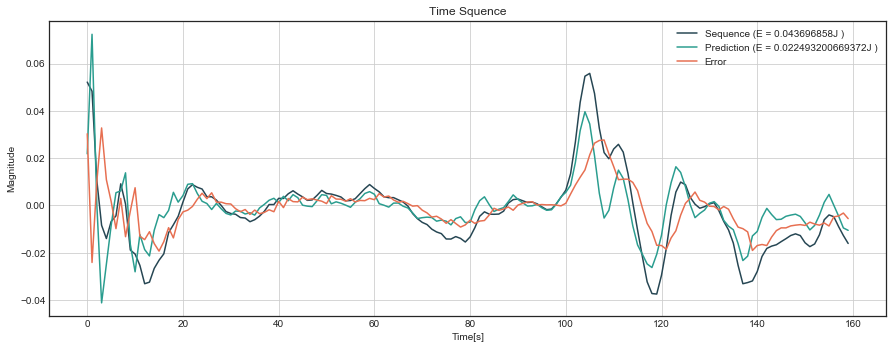

In [60]:
model.printPrediction()

#### Quantizing Error

In [61]:
# x_n 
import matplotlib.pyplot as plt
import numpy as np

# Setting model for x[n]
model = PredictionModel(x_n,coefficients_optimized)
model.getPrediction()  

# Quantizing error
perr = model.Quantizer2bin(model.error)
perr = perr.__array__()

# Getting values to display bins
perr_values = perr/len(model.error)
perr_values = set(perr)

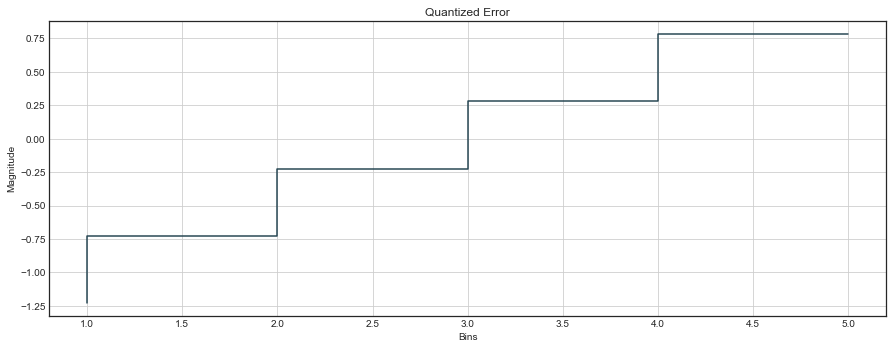

In [62]:
plt.figure(figsize=[15,25])
plt.subplot(4,1,1)
plt.step([1,2,3,4,5],sorted(perr_values), color='#264653')
plt.title("Quantized Error")
plt.xlabel('Bins')
plt.ylabel('Magnitude')
plt.grid()


x[n] Values:   [ 1. -1.  0.  2.  1. -1. -2.  0.  1.  0.]
X^ Values:     [ 0.2284  0.0551 -1.2835  1.4568  0.7954 -1.9449 -1.7403  0.433   2.2284
  0.2835]
Error Values:  [ 0.27874 -1.2284   0.78112  0.27874 -0.22364  0.78112 -0.72602 -0.72602
 -1.2284  -0.72602]
Prediction Gain:  -1.036040240114163


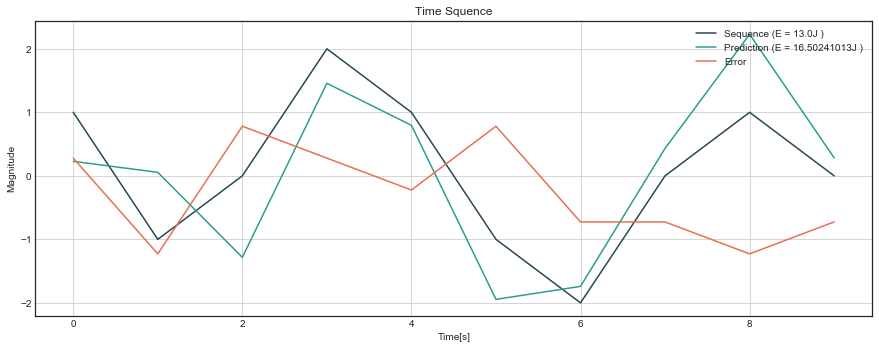

In [63]:
model.error = perr
model.printPrediction()

i.) What happened to the filter/predictor {a*} after quantization? Is it still stable?

    The predictor became less stable with the new coefficients. The error has increased greatly fron the original x^[n]

ii.) What happened to the error sequence e[n] after quantization?

    The quantized error is lessor than the original error from the prediction model.

iii.) What is the difference in prediction gain before/after quantization?

    The gain did decrease significatly from ~3 to ~1 of gain. The quantization did seem to tame the error

iv.) What is the mean-squared error between the quantized and unquantized error signals? 

    The quantized error included a larger factor of ~6 of error than that of the original (As calculated below in section 3.

## Part 3 - Integration|

[ 1.         -1.7074964   0.94891584 -0.16580744  0.02412729  0.28939646
 -0.76720893  0.573004   -0.08613308]


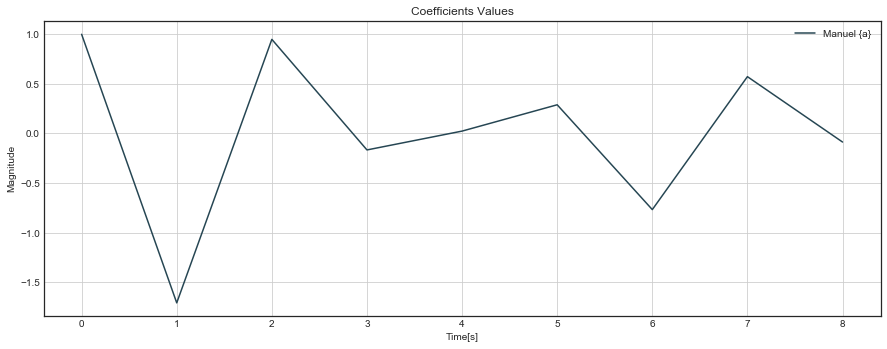

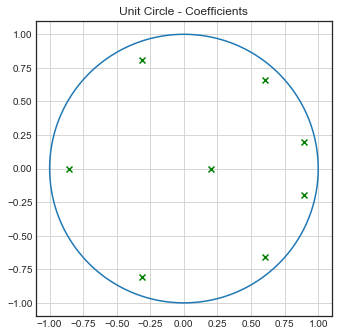

In [64]:
# Getting new x[n] - "snip.wave"
wav_x_n, sr = librosa.load("snip.wav", sr=None,duration=0.020)
                         
# Getting new coefficients for a 8th-order filter
wav_coefficients = librosa.lpc(wav_x_n, 8)
print(wav_coefficients)
    
model.plotCoefficients(wav_coefficients)

x[n] Values:   [ 0.05215454  0.04827881  0.01062012 -0.00839233 -0.01397705 -0.00674438
 -0.00439453  0.00915527  0.00061035 -0.01882935 -0.02053833 -0.02532959
 -0.03308105 -0.03240967 -0.02658081 -0.02316284 -0.02044678 -0.01147461
 -0.00814819 -0.00457764  0.00146484  0.00698853  0.00881958  0.00769043
  0.00695801  0.00372314  0.00366211  0.0022583   0.         -0.00259399
 -0.00338745 -0.00372314 -0.00509644 -0.00531006 -0.00686646 -0.00601196
 -0.0045166  -0.00247192  0.00039673  0.00039673  0.00302124  0.00296021
  0.00494385  0.00622559  0.00482178  0.00363159  0.00216675  0.00234985
  0.00424194  0.00637817  0.00506592  0.00482178  0.00427246  0.00360107
  0.00195312  0.00210571  0.00286865  0.00497437  0.0071106   0.0088501
  0.00720215  0.00576782  0.00369263  0.0032959   0.00332642  0.00241089
  0.00146484 -0.00024414 -0.00341797 -0.00558472 -0.00714111 -0.00805664
 -0.01000977 -0.01119995 -0.01190186 -0.01416016 -0.01419067 -0.01315308
 -0.01391602 -0.01544189 -0.01330566 

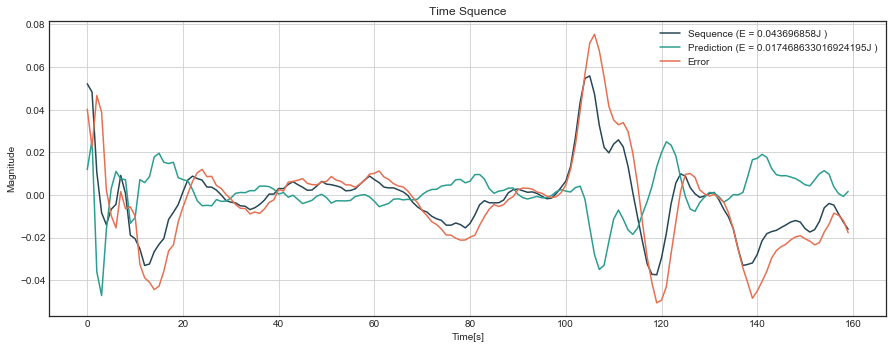

In [66]:
# Printing the respose of the 8th-order filter
model = PredictionModel(wav_x_n, coefficients_optimized, coefficients_optimized)
model.getPrediction() 

x_pree_original = model.error
x_perr = model.Quantizer2bin(model.error)
x_perr = perr.__array__()

model.printPrediction()

#### Reconstructing the Sequence

In [67]:
x_recon = model.x_hat + model.error

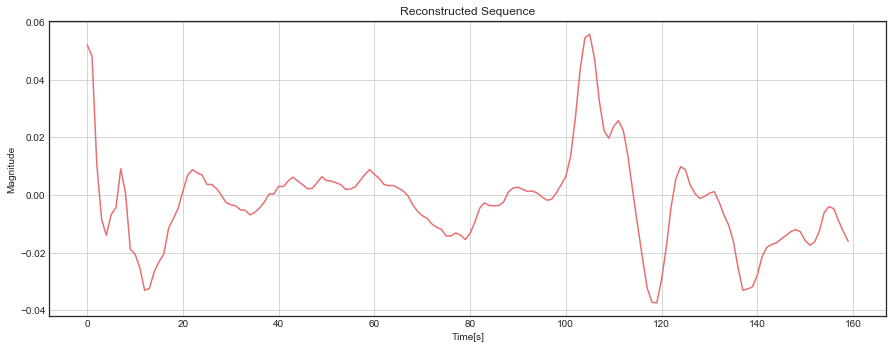

In [68]:
plt.figure(figsize=[15,25])
plt.subplot(4,1,1)
plt.plot(x_recon, color='#E76F71')
plt.title("Reconstructed Sequence")
plt.xlabel('Time[s]')
plt.ylabel('Magnitude')
plt.grid()

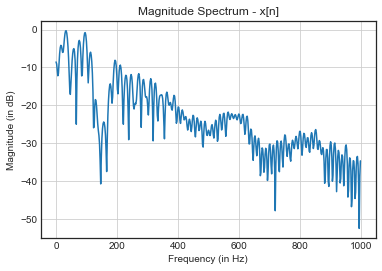

In [81]:
from scipy.fftpack import fft, fftfreq, fftshift

Fs = 2000


#setting nfft as 4x the closes power of 2 of length of the signal
nfft = int(4*(2**(np.ceil(np.log2(len(wav_x_n))))))

#doing fft and choosing only the positive frequency half
s_fft=fft(wav_x_n,nfft)
fft_freq=fftfreq(nfft,1/Fs)
dB=20*np.log10(abs(s_fft[0:nfft//2]))
fft_freq=fft_freq[0:nfft//2]

#plotting the fft spectrum graph
plt.plot(fft_freq,dB)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude (in dB)')
plt.title('Magnitude Spectrum - x[n]')
plt.grid()


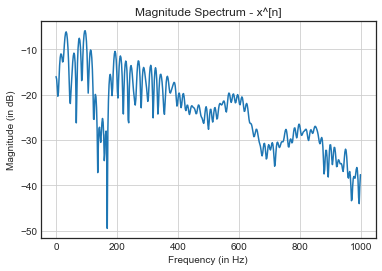

In [83]:
# x^[n] #
#setting nfft as 4x the closes power of 2 of length of the signal
nfft = int(4*(2**(np.ceil(np.log2(len( model.x_hat))))))

#doing fft and choosing only the positive frequency half
s_fft=fft( model.x_hat,nfft)
fft_freq=fftfreq(nfft,1/Fs)
dB=20*np.log10(abs(s_fft[0:nfft//2]))
fft_freq=fft_freq[0:nfft//2]

#plotting the fft spectrum graph
plt.plot(fft_freq,dB)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude (in dB)')
plt.title('Magnitude Spectrum - x^[n]')
plt.grid()

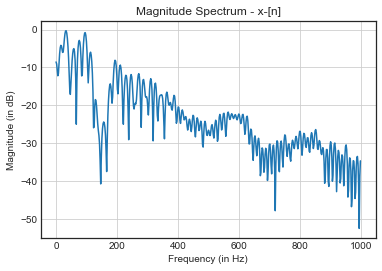

In [79]:
# New Sequence #
#setting nfft as 4x the closes power of 2 of length of the signal
nfft = int(4*(2**(np.ceil(np.log2(len(x_recon))))))

#doing fft and choosing only the positive frequency half
s_fft=fft(x_recon,nfft)
fft_freq=fftfreq(nfft,1/Fs)
dB=20*np.log10(abs(s_fft[0:nfft//2]))
fft_freq=fft_freq[0:nfft//2]

#plotting the fft spectrum graph
plt.plot(fft_freq,dB)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude (in dB)')
plt.title('Magnitude Spectrum - x-[n]')
plt.grid()

#### Mean-Squared Errors

In [70]:
# Between x[n] and x_hat[n], and the prediction gain
xn_MSE = model.find_energy(x_n)
xh_MSE = model.find_energy(model.x_hat)
prediction_gain = 10*np.log10(xn_MSE / xh_MSE)

print("x[n]  MSE: ", xn_MSE )
print("x[n]^ MSE: ", xh_MSE )
print("Prediction Gain: ", prediction_gain)

x[n]  MSE:  13.0
x[n]^ MSE:  0.017468633016924195
Prediction Gain:  28.716844310923427


In [73]:
# Between e[n] and eq[n] 
e_MSE = model.find_energy(x_pree_original)
eq_MSE = model.find_energy(x_perr)
prediction_gain = 10*np.log10(e_MSE / eq_MSE)

print("x[n]  MSE: ", e_MSE )
print("x[n]^ MSE: ", eq_MSE )
print("Prediction Gain: ", prediction_gain)


x[n]  MSE:  0.08229567772297078
x[n]^ MSE:  6.024951974800001
Prediction Gain:  -18.645765633822712


In [74]:
# Between x[n] and x^-[n] 
x_MSE = model.find_energy(wav_x_n)
xb_MSE = model.find_energy(x_recon)
prediction_gain = 10*np.log10(x_MSE / xb_MSE)

print("x[n]  MSE: ", x_MSE )
print("x[n]^ MSE: ", xb_MSE )
print("Prediction Gain: ", prediction_gain)

x[n]  MSE:  0.043696858
x[n]^ MSE:  0.04369685519486666
Prediction Gain:  2.776869685010178e-07


i.) What happened to the sequence after reconstruction?

    The newly constructed sequence resembled the origial x[n] function compared to the x^[n]

ii.) What happened to the error sequence e[n] after quantization?

    Sound is less distored with the extra noise featured in the wave.

iii.) Explain the noticeable differences in terms of spectral effects.


    The original x[n] and newly constructed x-[n] are very similar with litle differences. However, x^[n] follows a similar shape for the spectra, but not exectly. Higher frequencies are skewed and most of the gain throughout the spectra are lower than the original.

### Appendix

Github: https://github.com/agt28/Prediction-and-Quantization